# Importing Libraries

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, f1_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

FEATURE EXPLANATION
1. age (Age in years)
2.  sex : (1 = male, 0 = female)
3. cp (Chest Pain Type): [ 0: asymptomatic, 1: atypical angina, 2: non-anginal pain, 3: typical angina]
4. trestbps (Resting Blood Pressure in mm/hg )
5. chol (Serum Cholesterol in mg/dl)
6. fps (Fasting Blood Sugar > 120 mg/dl): [0 = no, 1 = yes]
7. restecg (Resting ECG): [0: showing probable or definite left ventricular 
8. thalach (maximum heart rate achieved)
9. exang (Exercise Induced Angina): [1 = yes, 0 = no]
10. oldpeak (ST depression induced by exercise relative to rest)
11. slope (the slope of the peak exercise ST segment): [0: downsloping; 1:  flat; 2: upsloping]
12. ca [number of major vessels (0–3)
13. thal : [1 = normal, 2 = fixed defect, 3 = reversible defect]
14. target: [0 = disease, 1 = no disease]

#Data import and merging

In [ ]:
# #column names
# col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

# #import all 4 datasets
# cleveland = pd.read_csv('/content/processed.cleveland.data', names=col_names, header=None)
# hungarian = pd.read_csv('/content/processed.hungarian.data', names=col_names, header=None)
# swizerland = pd.read_csv('/content/processed.switzerland.data', names=col_names, header=None)
# va = pd.read_csv('/content/processed.va.data', names=col_names, header=None)

# cleveland['Location'] = 'cleveland'
# hungarian['Location'] = 'hungarian'
# swizerland['Location'] = 'swizerland'
# va['Location'] = 'va'
# #merge dataframes
# frames = [cleveland, hungarian, swizerland, va]
# df = pd.concat(frames)

In [ ]:
# df.to_csv('/content/heart_disease_merged_data.csv', index = False)

In [ ]:
df = pd.read_csv('/content/heart_disease_merged_data_1.csv')

In [ ]:
df.shape

(920, 15)

920 instances, 15 attrbutes </br>
15th attribute is location which we will remove when training the model

cleveland     303
hungarian     294
va            200
swizerland    123
Name: Location, dtype: int64


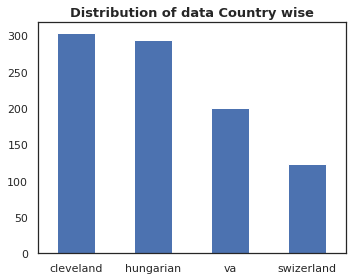

In [ ]:
#Distribution of data Country wise

print(df.Location.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["cleveland", "hungarian", "va", "swizerland"]
ax = df.Location.value_counts().plot(kind='bar')
ax.set_title("Distribution of data Country wise", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
plt.tight_layout()

0    411
1    265
2    109
3    107
4     28
Name: target, dtype: int64


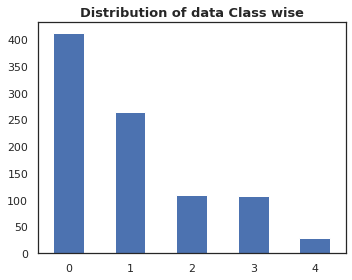

In [ ]:
#Distribution of data class wise

print(df.target.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["0", "1", "2", "3", "4"]
ax = df.target.value_counts().plot(kind='bar')
ax.set_title("Distribution of data Class wise", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
plt.tight_layout()

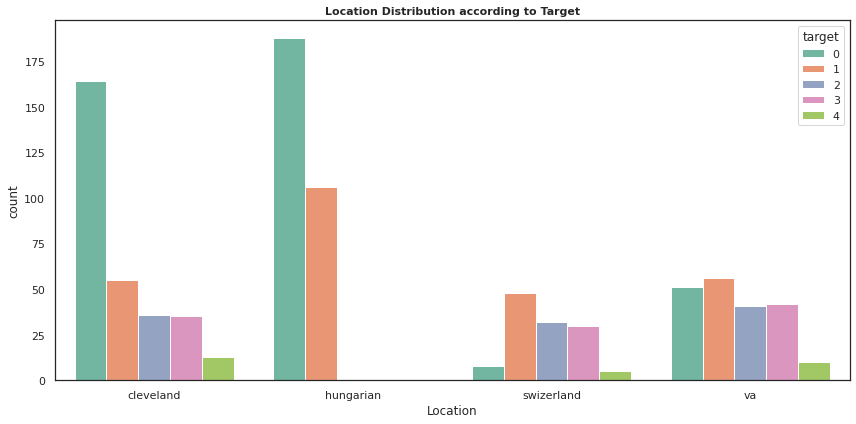

In [ ]:
#Gender against Target

fig, ax = plt.subplots(figsize=(12,6))
name = ["cleveland", "hungarian", "swizerland", "va"]
ax = sns.countplot(x='Location', hue='target', data=df, palette='Set2')
ax.set_title("Location Distribution according to Target", fontsize = 11, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)

plt.tight_layout()


#EDA

## Data Cleaning


### Find Null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       920 non-null    int64 
 1   sex       920 non-null    int64 
 2   cp        920 non-null    int64 
 3   trestbps  920 non-null    object
 4   chol      920 non-null    object
 5   fbs       920 non-null    object
 6   restecg   920 non-null    object
 7   thalach   920 non-null    object
 8   exang     920 non-null    object
 9   oldpeak   920 non-null    object
 10  slope     920 non-null    object
 11  ca        920 non-null    object
 12  thal      920 non-null    object
 13  target    920 non-null    int64 
 14  Location  920 non-null    object
dtypes: int64(4), object(11)
memory usage: 107.9+ KB


None of the entries are Null however Null is replaced by '?' in the data

In [ ]:
#find range of each attribute
df.nunique()
#Binary: sex, fbs, exang
#Categorical: cp, restecg, slope, ca, thal, target
#Continuous: age, trestbps, chol, thalac, oldpeak

age          50
sex           2
cp            4
trestbps     62
chol        218
fbs           3
restecg       4
thalach     120
exang         3
oldpeak      54
slope         4
ca            5
thal          4
target        5
Location      4
dtype: int64

### Clean 'ca' feature

In [ ]:
#cleaning 'ca' feature
#find unique values in 'ca'
df['ca'].unique()

#'ca' should have [0-3] values, hence we tackle the '?' 
print("unique values:", df['ca'].unique())
print("count for each value:", "\n", df.ca.value_counts(), "\n")

#preprocess
#611 values are missing for 'ca' i.e. '?'
#replace '?, 0, 1, 2' with NaN
df.loc[df['ca']=='?', 'ca'] = np.NaN

#result
print("unique values after processing:", df['ca'].unique())
print("count for each value after processing:", "\n", df.ca.value_counts())

unique values: ['0' '3' '2' '1' '?']
count for each value: 
 ?    611
0    181
1     67
2     41
3     20
Name: ca, dtype: int64 

unique values after processing: ['0' '3' '2' '1' nan]
count for each value after processing: 
 0    181
1     67
2     41
3     20
Name: ca, dtype: int64


### Clean 'thal' feature

In [ ]:
#cleaning 'thal' feature
#find unique values in 'thal'
df['thal'].unique()


print("unique values:", df['thal'].unique())
print("count for each value:", "\n", df.thal.value_counts(), "\n")

#preprocess
#486 values are missing for 'ca' i.e. '?'
#replace '? with NaN
df.loc[df['thal']=='?', 'thal'] = np.NaN

#result
print("unique values after processing:", df['thal'].unique())
print("count for each value after processing:", "\n", df.thal.value_counts())

unique values: ['6' '3' '7' '?']
count for each value: 
 ?    486
3    196
7    192
6     46
Name: thal, dtype: int64 

unique values after processing: ['6' '3' '7' nan]
count for each value after processing: 
 3    196
7    192
6     46
Name: thal, dtype: int64


### Clean 'slope' feature

In [ ]:
#slope
print("unique values:", df['slope'].unique())
print("count for each value:", "\n", df.slope.value_counts(), "\n")

#preprocess
df.loc[df['slope']=='?', 'slope'] = np.NaN

#result
print("unique values after processing:", df['slope'].unique())
print("count for each value after processing:", "\n", df.slope.value_counts())

unique values: ['3' '2' '1' '?']
count for each value: 
 2    345
?    309
1    203
3     63
Name: slope, dtype: int64 

unique values after processing: ['3' '2' '1' nan]
count for each value after processing: 
 2    345
1    203
3     63
Name: slope, dtype: int64


### Clean 'exang' feature

In [ ]:
#exang
print("unique values:", df['exang'].unique())
print("count for each value:", "\n", df.exang.value_counts(), "\n")

#preprocess
df.loc[df['exang']=='?', 'exang'] = np.NaN

#result
print("unique values after processing:", df['exang'].unique())
print("count for each value after processing:", "\n", df.exang.value_counts())

unique values: ['0' '1' '?']
count for each value: 
 0    528
1    337
?     55
Name: exang, dtype: int64 

unique values after processing: ['0' '1' nan]
count for each value after processing: 
 0    528
1    337
Name: exang, dtype: int64


### Clean 'restecg' feature

In [ ]:
#cp
df['restecg'].unique()
#already clean
#restecg
print("unique values:", df['restecg'].unique())
print("count for each value:", "\n", df.restecg.value_counts(), "\n")

#preprocess
df.loc[df['restecg']=='?', 'restecg'] = np.NaN

#result
print("unique values after processing:", df['restecg'].unique())
print("count for each value after processing:", "\n", df.restecg.value_counts())

unique values: ['2' '0' '1' '?']
count for each value: 
 0    551
2    188
1    179
?      2
Name: restecg, dtype: int64 

unique values after processing: ['2' '0' '1' nan]
count for each value after processing: 
 0    551
2    188
1    179
Name: restecg, dtype: int64


### Clean 'fbs' feature

In [ ]:
#fbs
df['fbs'].unique()
#already clean
#fbs
print("unique values:", df['fbs'].unique())
print("count for each value:", "\n", df.fbs.value_counts(), "\n")

# #preprocess
df.loc[df['fbs']=='?', 'fbs'] = np.NaN

#result
print("unique values after processing:", df['fbs'].unique())
print("count for each value after processing:", "\n", df.fbs.value_counts())

unique values: ['1' '0' '?']
count for each value: 
 0    692
1    138
?     90
Name: fbs, dtype: int64 

unique values after processing: ['1' '0' nan]
count for each value after processing: 
 0    692
1    138
Name: fbs, dtype: int64


In [ ]:
#oldpeak
df['oldpeak'].unique()

print("unique values:", df['oldpeak'].unique())
print("count for each value:", "\n", df.oldpeak.value_counts(), "\n")

# #preprocess
df.loc[df['oldpeak']=='?', 'oldpeak'] = np.NaN

#result
print("unique values after processing:", df['oldpeak'].unique())
print("count for each value after processing:", "\n", df.oldpeak.value_counts())

unique values: ['2.3' '1.5' '2.6' '3.5' '1.4' '0.8' '3.6' '0.6' '3.1' '0.4' '1.3' '0'
 '0.5' '1.6' '1' '1.2' '0.2' '1.8' '3.2' '2.4' '2' '2.5' '2.2' '2.8' '3'
 '3.4' '6.2' '4' '5.6' '2.9' '0.1' '2.1' '1.9' '4.2' '0.9' '1.1' '3.8'
 '0.7' '0.3' '4.4' '5' '?' '-1.1' '-1.5' '-0.1' '-2.6' '-0.7' '-2' '-1'
 '1.7' '-0.8' '-0.5' '-0.9' '3.7']
count for each value: 
 0       370
1        83
2        76
?        62
1.5      48
3        28
0.5      19
1.2      17
2.5      16
0.8      15
1.4      15
0.6      14
1.6      14
0.2      14
1.8      12
0.4      10
0.1       9
4         8
2.8       7
2.6       7
1.3       5
2.2       5
0.3       5
0.7       5
1.9       5
2.4       4
0.9       4
3.6       4
1.1       4
3.4       3
-1        2
1.7       2
-0.5      2
2.3       2
4.2       2
2.1       2
3.5       2
3.2       2
-0.9      1
-0.8      1
3.1       1
-2        1
-0.7      1
-2.6      1
-0.1      1
-1.5      1
-1.1      1
6.2       1
5         1
4.4       1
5.6       1
2.9       1
3.8       1
3.7

### Clean 'target' feature

In [ ]:
#cleaning 'target' feature
#find unique values in 'target'
df['target'].unique()

array([0, 2, 1, 3, 4])

In [ ]:
#'target' should have [0-4] value
#count number of values for each 
df.target.value_counts()

0    411
1    265
2    109
3    107
4     28
Name: target, dtype: int64

In [ ]:
# #since heart disease has 4 stages we will merge stage 3 and 4, this also helps in class balancing
# #replace '4' with 3
# df.loc[df['target']== 4, 'target'] = 3
# df['target'].unique()

### Clean 'trestbps' feature

In [ ]:
#trestbps
df['trestbps'].unique()

print("unique values:", df['trestbps'].unique())
print("count for each value:", "\n", df.trestbps.value_counts(), "\n")

# #preprocess
df.loc[df['trestbps']=='?', 'trestbps'] = np.NaN

#result
print("unique values after processing:", df['trestbps'].unique())
print("count for each value after processing:", "\n", df.trestbps.value_counts())

unique values: ['145' '160' '120' '130' '140' '172' '150' '110' '132' '117' '135' '112'
 '105' '124' '125' '142' '128' '170' '155' '104' '180' '138' '108' '134'
 '122' '115' '118' '100' '200' '94' '165' '102' '152' '101' '126' '174'
 '148' '178' '158' '192' '129' '144' '123' '136' '146' '106' '156' '154'
 '114' '164' '98' '190' '?' '113' '92' '95' '80' '185' '116' '0' '96'
 '127']
count for each value: 
 120    131
130    115
140    102
110     59
?       59
      ... 
101      1
123      1
174      1
129      1
127      1
Name: trestbps, Length: 62, dtype: int64 

unique values after processing: ['145' '160' '120' '130' '140' '172' '150' '110' '132' '117' '135' '112'
 '105' '124' '125' '142' '128' '170' '155' '104' '180' '138' '108' '134'
 '122' '115' '118' '100' '200' '94' '165' '102' '152' '101' '126' '174'
 '148' '178' '158' '192' '129' '144' '123' '136' '146' '106' '156' '154'
 '114' '164' '98' '190' nan '113' '92' '95' '80' '185' '116' '0' '96'
 '127']
count for each value after 

### Clean 'chol' feature

In [ ]:
#chol
df['chol'].unique()

print("unique values:", df['chol'].unique())
print("count for each value:", "\n", df.chol.value_counts(), "\n")

# #preprocess
df.loc[df['chol']=='?', 'chol'] = np.NaN

#result
print("unique values after processing:", df['chol'].unique())
print("count for each value after processing:", "\n", df.chol.value_counts())

unique values: ['233' '286' '229' '250' '204' '236' '268' '354' '254' '203' '192' '294'
 '256' '263' '199' '168' '239' '275' '266' '211' '283' '284' '224' '206'
 '219' '340' '226' '247' '167' '230' '335' '234' '177' '276' '353' '243'
 '225' '302' '212' '330' '175' '417' '197' '198' '290' '253' '172' '273'
 '213' '305' '216' '304' '188' '282' '185' '232' '326' '231' '269' '267'
 '248' '360' '258' '308' '245' '270' '208' '264' '321' '274' '325' '235'
 '257' '164' '141' '252' '255' '201' '222' '260' '182' '303' '265' '309'
 '307' '249' '186' '341' '183' '407' '217' '288' '220' '209' '227' '261'
 '174' '281' '221' '205' '240' '289' '318' '298' '564' '246' '322' '299'
 '300' '293' '277' '214' '207' '223' '160' '394' '184' '315' '409' '244'
 '195' '196' '126' '313' '259' '200' '262' '215' '228' '193' '271' '210'
 '327' '149' '295' '306' '178' '237' '218' '242' '319' '166' '180' '311'
 '278' '342' '169' '187' '157' '176' '241' '131' '132' '?' '161' '173'
 '194' '297' '292' '339' '147' '291' '

In [ ]:
#thalach
df['thalach'].unique()

print("unique values:", df['thalach'].unique())
print("count for each value:", "\n", df.thalach.value_counts(), "\n")

# #preprocess
df.loc[df['thalach']=='?', 'thalach'] = np.NaN

#result
print("unique values after processing:", df['thalach'].unique())
print("count for each value after processing:", "\n", df.thalach.value_counts())

unique values: ['150' '108' '129' '187' '172' '178' '160' '163' '147' '155' '148' '153'
 '142' '173' '162' '174' '168' '139' '171' '144' '132' '158' '114' '151'
 '161' '179' '120' '112' '137' '157' '169' '165' '123' '128' '152' '140'
 '188' '109' '125' '131' '170' '113' '99' '177' '141' '180' '111' '143'
 '182' '156' '115' '149' '145' '146' '175' '186' '185' '159' '130' '190'
 '136' '97' '127' '154' '133' '126' '202' '103' '166' '164' '184' '124'
 '122' '96' '138' '88' '105' '194' '195' '106' '167' '95' '192' '117'
 '121' '116' '71' '118' '181' '134' '90' '98' '176' '135' '110' '?' '100'
 '87' '102' '92' '91' '82' '119' '94' '104' '60' '83' '63' '70' '77' '72'
 '78' '86' '93' '67' '84' '80' '107' '69' '73']
count for each value: 
 ?      55
150    43
140    41
120    35
130    30
       ..
195     1
87      1
187     1
192     1
73      1
Name: thalach, Length: 120, dtype: int64 

unique values after processing: ['150' '108' '129' '187' '172' '178' '160' '163' '147' '155' '148' '153'
 

### Clean other features

In [ ]:
#cp
df['cp'].unique()
#already clean

array([1, 4, 3, 2])

In [ ]:
#sex
df['sex'].unique()
#already clean

array([1, 0])

### Find missing values and replace with median value

In [ ]:
df.isnull().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
Location      0
dtype: int64

In [ ]:
#'lots of missing values for fbs, exang, oldpeak, slope, ca, thal
#replace missing values with median value
df = df.fillna(df.median())
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
Location    0
dtype: int64

### Change datatype

In [ ]:
#change datatype of 'ca' and 'thal' from object to float ->for heatmap generation
df['trestbps']=df.trestbps.astype(float)
df['chol']=df.chol.astype(float)
df['fbs']=df.fbs.astype(int)
df['restecg']=df.restecg.astype(int)
df['thalach']=df.thalach.astype(float)
df['exang']=df.exang.astype(int)
df['oldpeak']=df.oldpeak.astype(float)
df['slope']=df.slope.astype(int)
df['ca']=df.ca.astype(int)
df['thal']=df.thal.astype(int)
df.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
Location     object
dtype: object

### Remove duplicate values

In [ ]:
#find duplicate rows and delete
duplicated= df.duplicated().sum()
duplicated
#two duplicates found

2

In [ ]:
duplicated = df[df.duplicated(keep=False)]
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Location
404,49,0,2,110.0,223.0,0,0,160.0,0,0.0,2,0,6,0,hungarian
405,49,0,2,110.0,223.0,0,0,160.0,0,0.0,2,0,6,0,hungarian
859,58,1,3,150.0,219.0,0,1,118.0,1,0.0,2,0,6,2,va
907,58,1,3,150.0,219.0,0,1,118.0,1,0.0,2,0,6,2,va


In [ ]:
#remove duplicate rows
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Location
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0,6,0,cleveland
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3,3,2,cleveland
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1,cleveland
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0,3,0,cleveland
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0,cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,0,4,127.0,333.0,1,1,154.0,0,0.0,2,0,6,1,va
916,62,1,1,130.0,139.0,0,1,140.0,0,0.5,2,0,6,0,va
917,55,1,4,122.0,223.0,1,1,100.0,0,0.0,2,0,6,2,va
918,58,1,4,130.0,385.0,1,2,140.0,0,0.5,2,0,6,0,va


In [ ]:
df.shape
#(min-max)= Sex (0–1), cp (0–3), fbs (0–1), restecg (0–2), exang (0–1), slope (0–2), ca (0–3), thal (0–3)

(920, 15)

### Creating Labels for Feature values

In [ ]:
# df['target'] = df.target.replace({0: "Stage_1", 1: "Stage_2", 2: "Stage_3", 3: "Stage_4"})
# df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
# df['cp'] = df.cp.replace({1: "typical_angina", 
#                           2: "atypical_angina", 
#                           3:"non-anginal pain",
#                           4: "asymtomatic"})
# df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
# df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
# df['slope'] = df.slope.replace({1: "upsloping", 2: "flat",3:"downsloping"})
# df['thal'] = df.thal.replace({3: "normal", 6: "fixed_defect", 7:"reversable_defect"})

### Outlier Removal (for continuous variables)

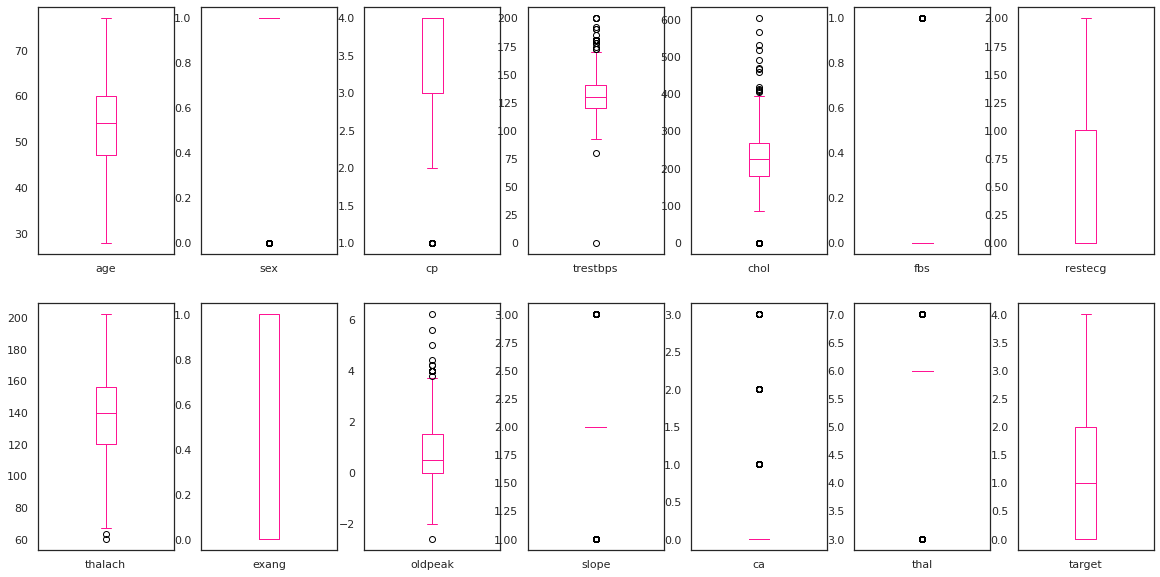

In [ ]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

In [ ]:
# define continuous variable & plot
continous_features = ['age','trestbps','chol','oldpeak', 'thalach']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 28
For the feature chol, No of Outliers is 185
For the feature oldpeak, No of Outliers is 16
For the feature thalach, No of Outliers is 2


In [ ]:
outliers(df[continous_features], drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from oldpeak feature removed
Outliers from thalach feature removed


In [ ]:

df.shape

(703, 15)


703 instances left from 920

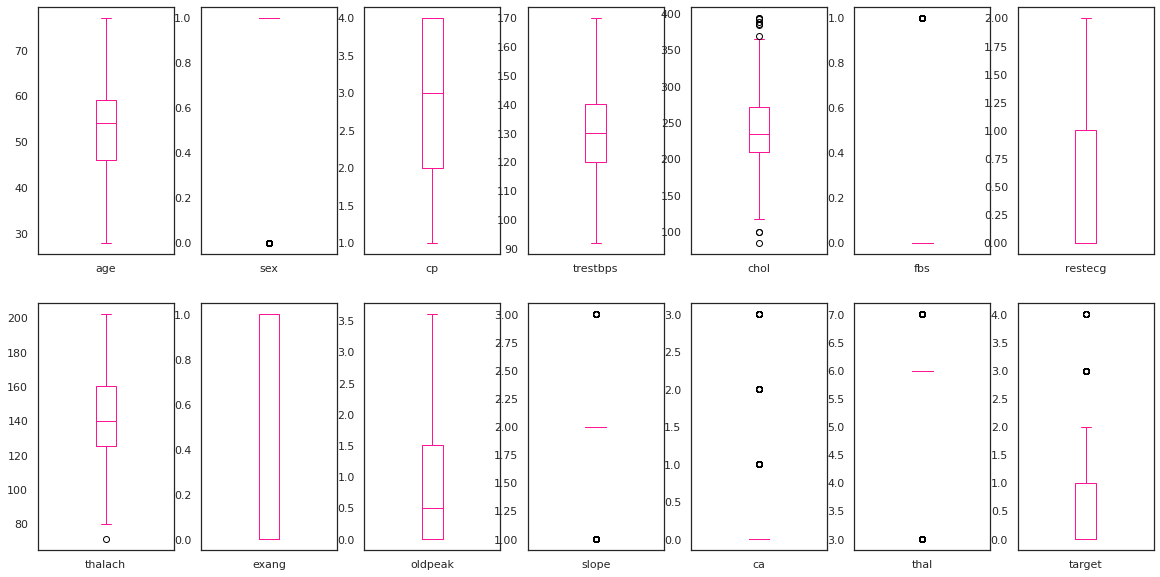

In [ ]:
#outliers removed
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

## Univariate Analysis

0    378
1    189
2     60
3     60
4     16
Name: target, dtype: int64


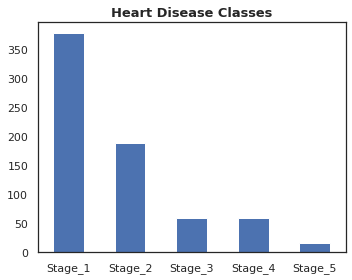

In [ ]:
#HEART DISEASE CLASSES

print(df.target.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["Stage_1", "Stage_2", "Stage_3", "Stage_4", "Stage_5"]
ax = df.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
plt.tight_layout()

more patients with Stage 1 severity

Text(0.5, 1.0, 'Distribution of Continuous Variables')

<Figure size 432x288 with 0 Axes>

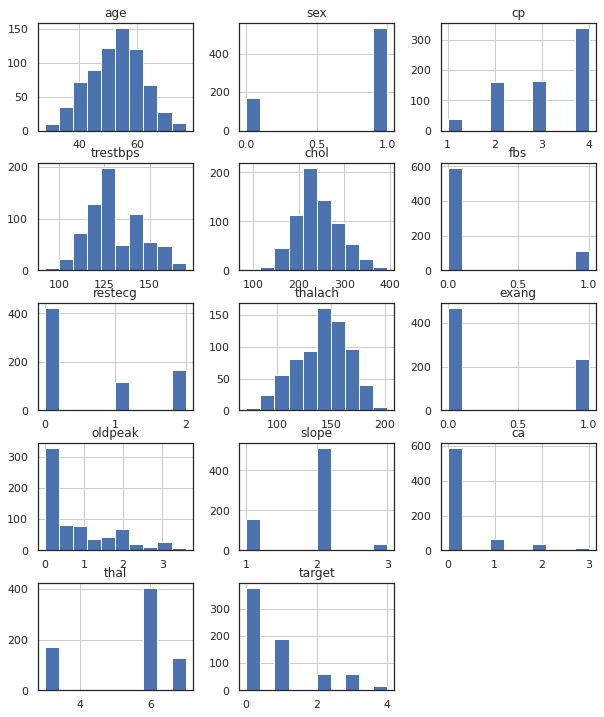

In [ ]:
#Distribution of Continuous variables
plt.figure()
df.hist(layout=(8,3), figsize=(10,20));
plt.title('Distribution of Continuous Variables')

-normal distribution for: age, trestbps and almost for chol 

## Bivariate Analysis

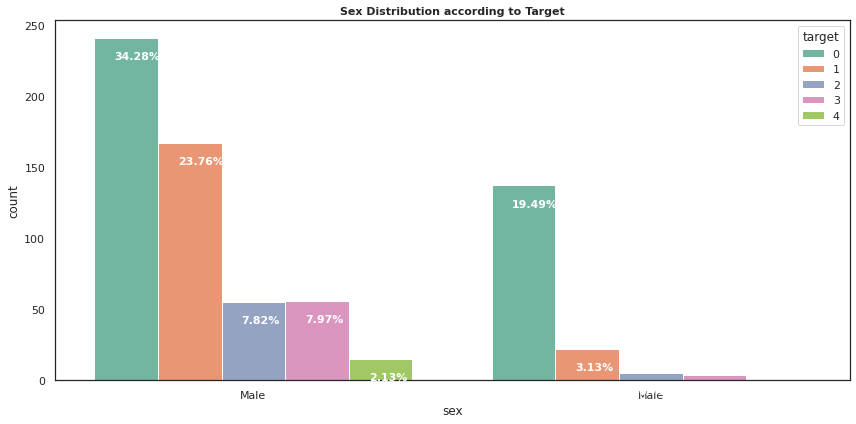

In [ ]:
#Gender against Target

fig, ax = plt.subplots(figsize=(12,6))
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
name =   df['sex']
ax = sns.countplot(x='sex', hue='target', data=df, palette='Set2')
ax.set_title("Sex Distribution according to Target", fontsize = 11, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='white', weight = 'bold')  
plt.tight_layout()

More number of diseased males than females with heart disease

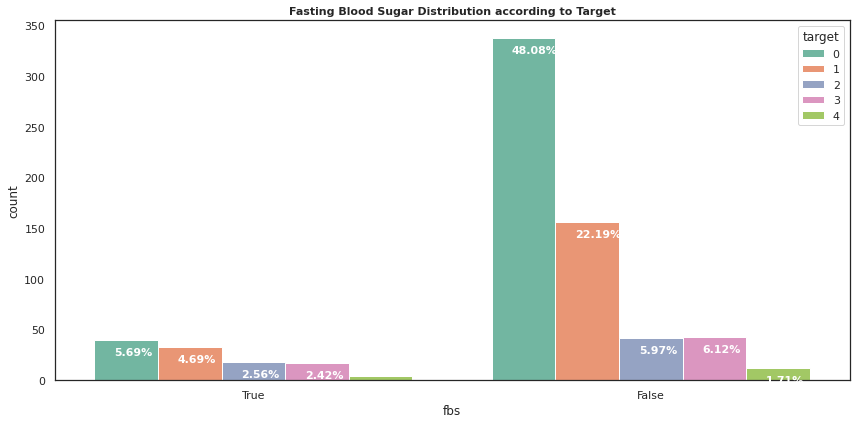

In [ ]:
#fbs 'Fasting Blood Sugar' against Target

fig, ax = plt.subplots(figsize=(12,6))
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
name = df['fbs']
ax = sns.countplot(x='fbs', hue='target', data=df, palette='Set2')
ax.set_title("Fasting Blood Sugar Distribution according to Target", fontsize = 11, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=11,
                color='white', weight = 'bold')  
plt.tight_layout()

fbs >120 mg/d is diabetic (True class) however, Non-diabetic patients show a higher percentage of heart disease hence, this feature is not significant when deciding Diseased or non-diseased patient

## Multivariate Analysis

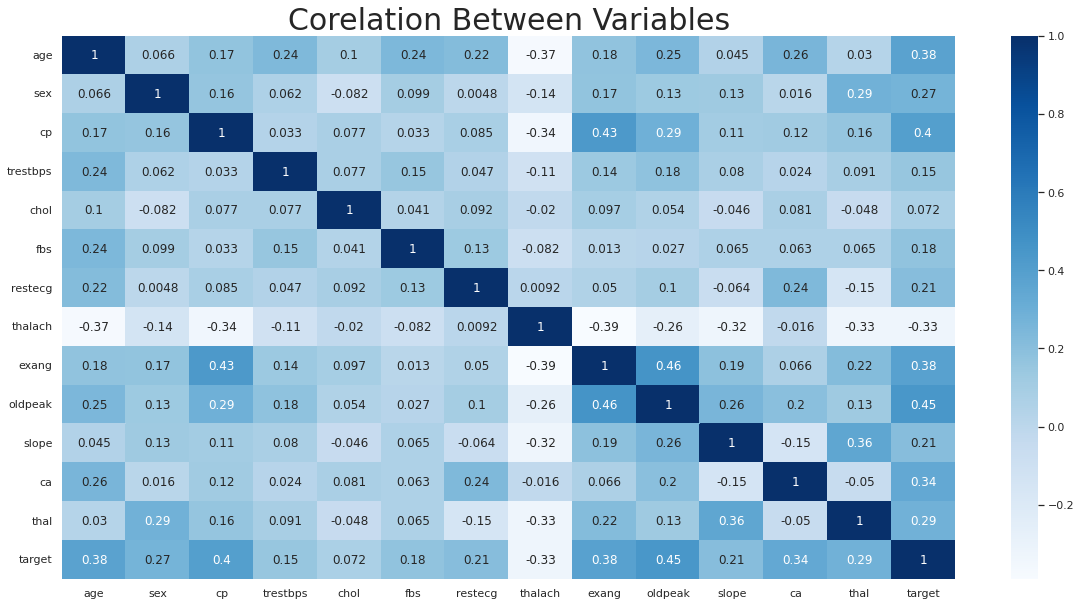

In [ ]:
df['sex'] = df.sex.replace({"Male": 1, "Female": 0})
df['fbs'] = df.fbs.replace({"True": 1, "False": 0})

sns.set(style="white") 
plt.rcParams['figure.figsize'] = (20, 10) 
sns.heatmap(df.corr(), annot = True, cmap="Blues")
plt.title('Corelation Between Variables', fontsize = 30)
plt.show()

oldpeak, cp show a good relation with target
thalach shows a negative correlation with target
fbs, chol, trestbps, restecg show low correlation with target

# Data Augmentation for Class Balancing

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import train_test_split
import random

df = df.sample(frac=1).reset_index(drop=True)

X = df.drop(['target'], axis = 1)
X = X.drop(['Location'], axis = 1)
y = df['target']

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X, y)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Test target statistics: {Counter(y, axis =1 )}")

Training target statistics: Counter({1: 378, 0: 378, 4: 378, 2: 378, 3: 378})
Test target statistics: Counter({0: 378, 1: 189, 2: 60, 3: 60, 4: 16, 'axis': 1})


1    378
0    378
4    378
2    378
3    378
Name: target, dtype: int64


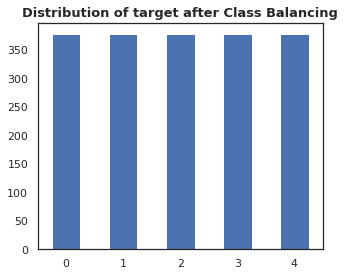

In [ ]:
print(y_res.value_counts())
fig, ax = plt.subplots(figsize=(5,4))
name = ["0", "1", "2", "3", "4"]
ax = y_res.value_counts().plot(kind='bar')
ax.set_title("Distribution of target after Class Balancing", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)
plt.tight_layout()

# Test Train split

In [ ]:
# X_res.shape

In [ ]:
#split train and test
X, X_test, Y, Y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=4)
print ('Train+Val set:  ', X.shape,  Y.shape)
print ('Test set:   ', X_test.shape,  Y_test.shape)

Train+Val set:   (1323, 13) (1323,)
Test set:    (567, 13) (567,)


In [ ]:
#split train and validation from train
X_train, X_val, Y_train, Y_val = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:  ', X_train.shape,  Y_train.shape)
print ('Validation set:   ', X_val.shape,  Y_val.shape)

Train set:   (926, 13) (926,)
Validation set:    (397, 13) (397,)


In [ ]:
# one hot encoding
from keras.utils.np_utils import to_categorical

y_train = to_categorical(Y_train, num_classes=5)
y_test = to_categorical(Y_test, num_classes=5)
y_val = to_categorical(Y_val, num_classes=5)
print (y_train.shape)
print (y_test.shape)
print (y_val.shape)

(926, 5)
(567, 5)
(397, 5)


# Neural Network
Opt 1: Optimizer Adamax, Lr: 0.0001, Accuracy 62%, Val_acc: 66%, batch: 2 </br>
Opt 2: Optimizer Adam, Lr: 0.001, Accuracy 67%, Val_acc: 59%, batch: 2 </br>
Opt 3: Optimizer Adam, Lr: 0.001, Accuracy 67.44%, Val_acc: 54%, batch: 5 </br>
Opt 4: Optimizer Adam, Lr: 0.0001, Accuracy 67%, Val_acc: 62%, batch: 5 </br>
Opt 5: Optimizer Nadam, Lr: 0.0001, Accuracy 65%, Val_acc: 68%, batch: 5 (Final for now)</br> 


## Training NN

In [ ]:
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model2 = Sequential()
    model2.add(Dense(128, input_dim=13, kernel_initializer='normal', activation='relu'))
    model2.add(Dense(84, kernel_initializer='normal', activation='relu'))
    model2.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model2.add(Dense(5, activation='softmax'))
    
    # # compile model
    adam = Adam(lr=0.001)
    model2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model2

model2 = create_model()

print(model2.summary())

# fit the model to the training data
import time
start_time = time.time()
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=5, verbose = 1, validation_data = (X_val, y_val))
print("--- %s seconds ---" % (time.time() - start_time))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               1792      
                                                                 
 dense_33 (Dense)            (None, 84)                10836     
                                                                 
 dense_34 (Dense)            (None, 16)                1360      
                                                                 
 dense_35 (Dense)            (None, 5)                 85        
                                                                 
Total params: 14,073
Trainable params: 14,073
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


186/186 [==============================] - 2s 6ms/step - loss: 1.6326 - accuracy: 0.2592 - val_loss: 1.4935 - val_accuracy: 0.3577
Epoch 2/100
186/186 [==============================] - 1s 5ms/step - loss: 1.5022 - accuracy: 0.3391 - val_loss: 1.4560 - val_accuracy: 0.3249
Epoch 3/100
186/186 [==============================] - 1s 5ms/step - loss: 1.4714 - accuracy: 0.3348 - val_loss: 1.3985 - val_accuracy: 0.3879
Epoch 4/100
186/186 [==============================] - 1s 5ms/step - loss: 1.4270 - accuracy: 0.3747 - val_loss: 1.3386 - val_accuracy: 0.3980
Epoch 5/100
186/186 [==============================] - 1s 5ms/step - loss: 1.3850 - accuracy: 0.3834 - val_loss: 1.2941 - val_accuracy: 0.4534
Epoch 6/100
186/186 [==============================] - 1s 5ms/step - loss: 1.3644 - accuracy: 0.3898 - val_loss: 1.2697 - val_accuracy: 0.4332
Epoch 7/100
186/186 [==============================] - 1s 5ms/step - loss: 1.3339 - accuracy: 0.4093 - val_loss: 1.3116 - val_accuracy: 0.4131
Epoch 8/100

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


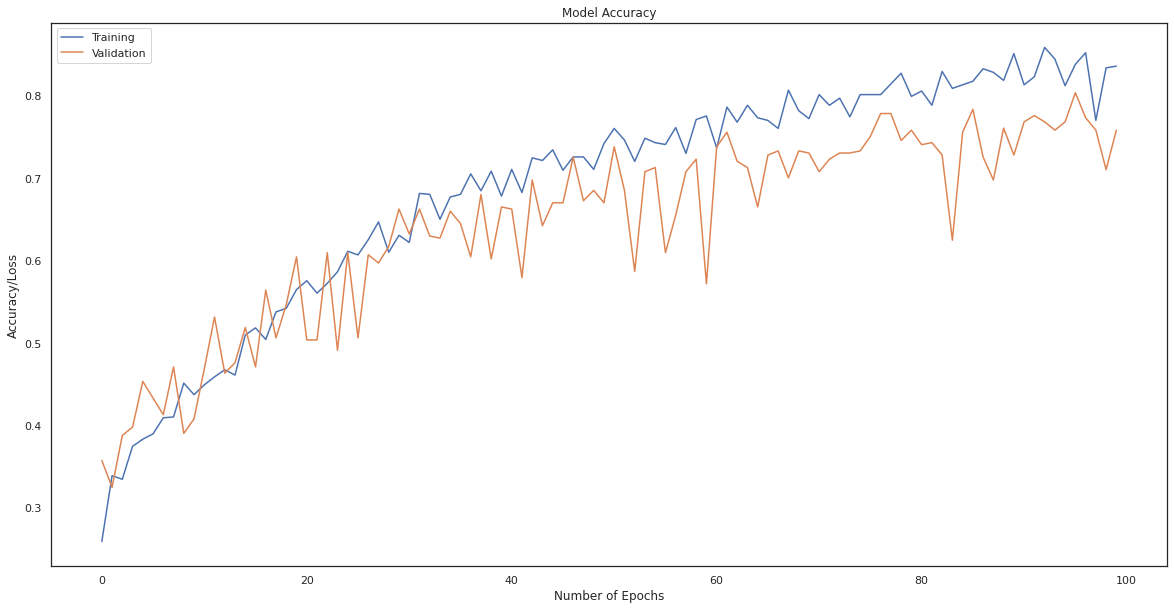

In [ ]:
print(history2.history.keys())
# Accuracy Visualization
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy/Loss')
plt.xlabel('Number of Epochs')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()



## Testing NN

In [ ]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

X_pred = np.argmax(model2.predict(X_test), axis=1)
y_pred = np.argmax(y_test, axis=1)
print('Results for Categorical Model')
nn_acc = accuracy_score(y_pred, X_pred)
print(accuracy_score(y_pred, X_pred))
print(classification_report(y_pred, X_pred))

Results for Categorical Model
0.7707231040564374
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       114
           1       0.65      0.56      0.60       119
           2       0.68      0.95      0.79       110
           3       0.87      0.65      0.74       111
           4       0.92      1.00      0.96       113

    accuracy                           0.77       567
   macro avg       0.78      0.77      0.77       567
weighted avg       0.78      0.77      0.76       567



#Machine Learning

##XGBoost

### Training XGBoost

In [ ]:
#train XGBoost
xgboost = XGBClassifier(max_depth=8, learning_rate=0.01)
history_xgboost = xgboost.fit(X_train, Y_train)

### Testing XGBoost

In [ ]:
#Test XGBoost
X_pred = xgboost.predict(X_test)
y_pred = np.argmax(y_test, axis=1)
print('Results for XGBoost Model')
print(accuracy_score(y_pred, X_pred))
print(classification_report(y_pred, X_pred))
xgboost_acc=accuracy_score(y_pred, X_pred)

Results for XGBoost Model
0.8447971781305115
              precision    recall  f1-score   support

           0       0.78      0.70      0.74       114
           1       0.72      0.69      0.70       119
           2       0.90      0.94      0.92       110
           3       0.91      0.91      0.91       111
           4       0.90      1.00      0.95       113

    accuracy                           0.84       567
   macro avg       0.84      0.85      0.84       567
weighted avg       0.84      0.84      0.84       567



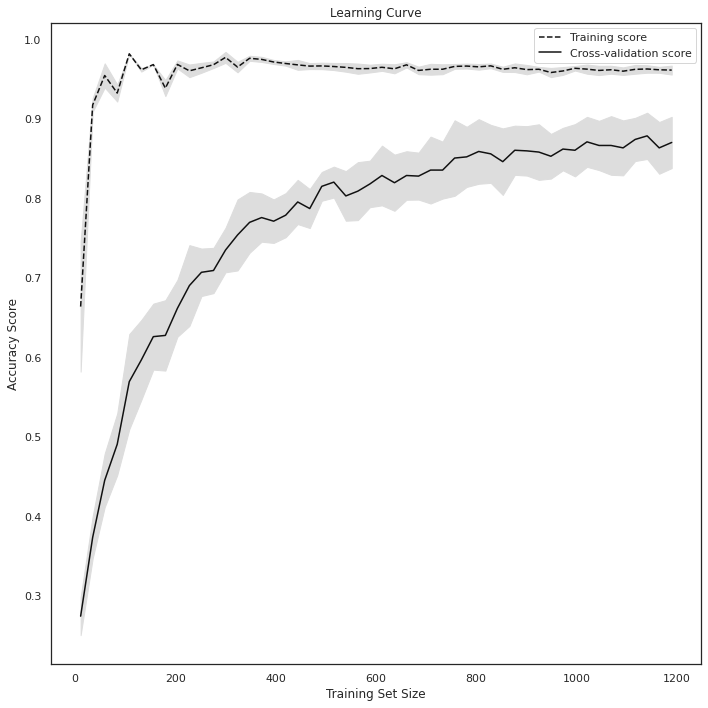

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(XGBClassifier(max_depth=8, learning_rate=0.01), X, Y, cv=10, scoring='accuracy',  train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Random Forest

### Training Random Forest

In [ ]:
#Train RF
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)


RandomForestClassifier()

### Testing Random Forest

In [ ]:
#test RF
X_pred = clf.predict(X_test)
y_pred = np.argmax(y_test, axis=1)
print('Results for Random Forest Model')
rf_acc=accuracy_score(y_pred, X_pred)
print(accuracy_score(y_pred, X_pred))
print(classification_report(y_pred, X_pred))



Results for Random Forest Model
0.9223985890652557
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       114
           1       0.87      0.80      0.83       119
           2       0.96      0.97      0.96       110
           3       0.93      0.99      0.96       111
           4       0.98      1.00      0.99       113

    accuracy                           0.92       567
   macro avg       0.92      0.92      0.92       567
weighted avg       0.92      0.92      0.92       567



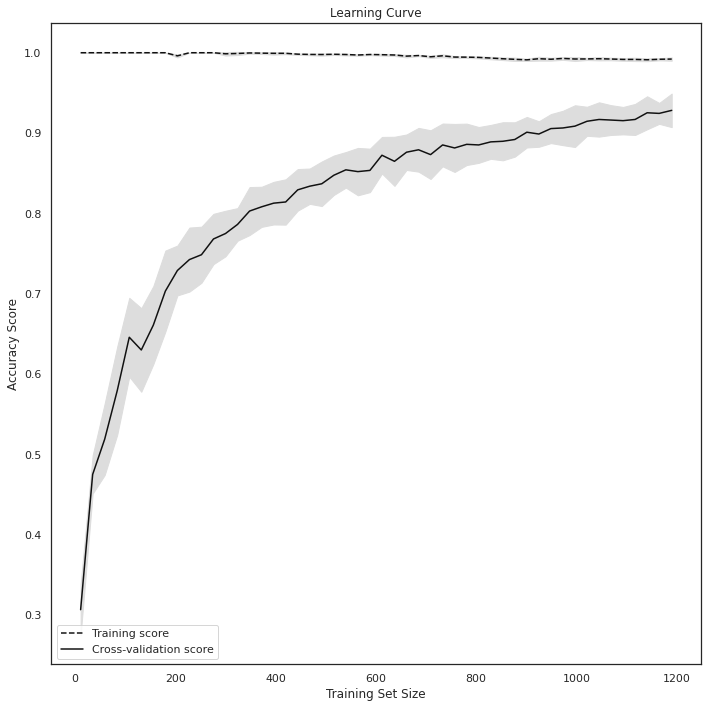

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(max_depth=10, random_state=1), X, Y, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

#Comparing all the models


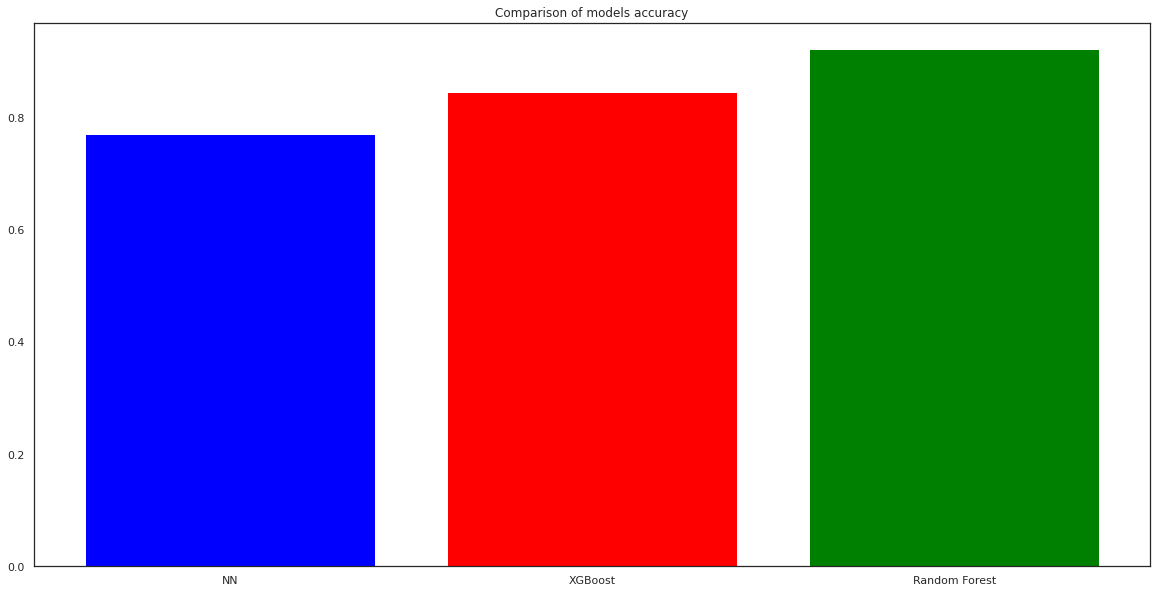

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
bars = ['NN', 'XGBoost', 'Random Forest']
height = [nn_acc, xgboost_acc, rf_acc]
x_pos = np.arange(len(bars))
plt.bar(x_pos, height,  color=['blue', 'red', 'green'])
plt.xticks(x_pos, bars)
# Show graph
plt.title("Comparison of models accuracy")
plt.show()

Accuracy


1.   NN = 77%
2.   XGBoost = 84%
3.   RF = 92%

